!pip install matplotlib 

In [ ]:
words = open("names.txt","r").read().splitlines()


In [ ]:
len(words)

In [ ]:
min(len(w) for w in words)

In [ ]:
max(len(w) for w in words)

In [ ]:
15]

In [ ]:
words[-10:]

In [ ]:
words[len(words) -1]

In [ ]:
# bi-grams, 2 letter words
for w in words[:1]:
    for ch1, ch2 in zip(w,w[1:]):
        print(ch1, ch2)

In [ ]:
w

In [ ]:
w[1:]

In [ ]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

In [ ]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1
        # print(ch1, ch2)

In [ ]:
b.items()

In [ ]:
sorted(b.items(), key = lambda kv: kv[1])

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [ ]:
import torch

In [ ]:
a = torch.zeros((3,5), dtype = torch.int32)
a

In [ ]:
a.dtype

In [ ]:
a[1,3] = 1
a

In [ ]:
a[1,3] += 1
a

In [ ]:
# 26 letters + <S> and <#>
N = torch.zeros((28,28), dtype=torch.int32)

In [ ]:
N

In [ ]:
sorted(list(set(''.join(words))))

In [ ]:
words[:5]

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
chars

In [ ]:
stoi

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ ix1, ix2 ] += 1

In [ ]:
# N['a','r'] is the number of occurence that a,r sequence happened in list of names
N

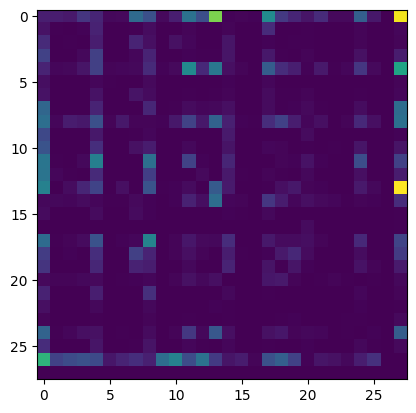

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [58]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

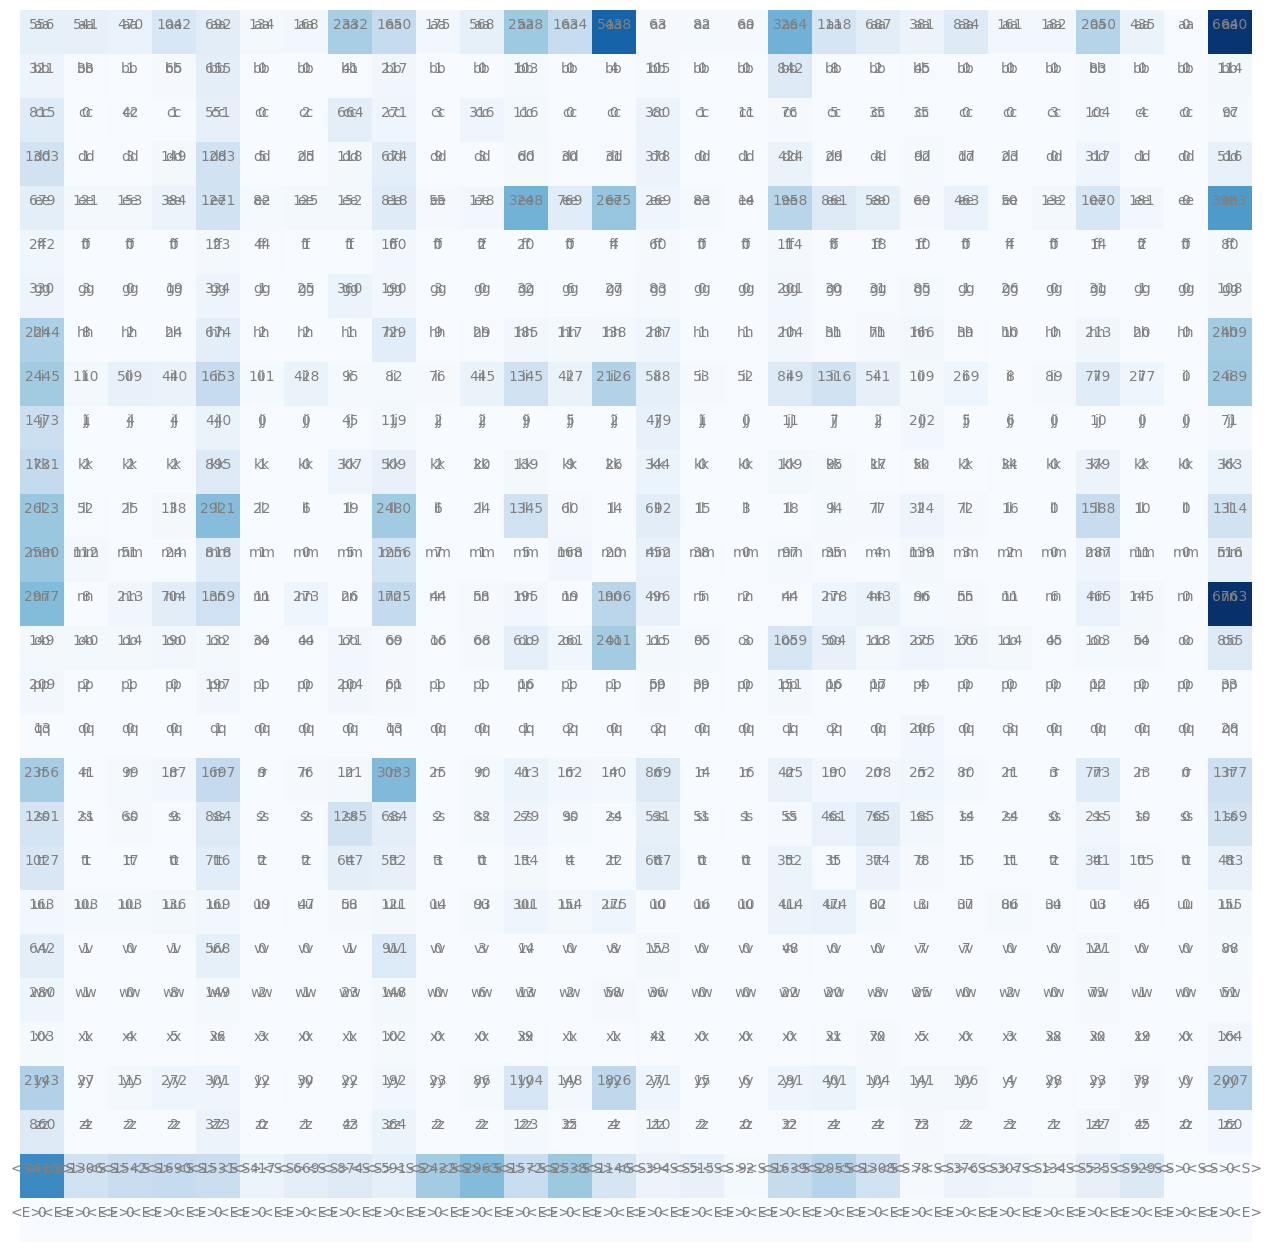

In [60]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[i]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="bottom", color="gray")
plt.axis('off')

In [ ]:
# problem - 
# <E> is never the first character in the bigram <E>A -entire row of 0
# <S> could never be the 2nd chat in the bigram R<S> - entire oolumn of 0
# <S?<E> can never happen or <E><S>
# clean up the data - wasting space

use omly one special token
use omly one spcecial token. use 27x27 array

In [61]:
# 26 letters + <S> and <#>
N = torch.zeros((27,27), dtype=torch.int32)

In [68]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}        # first char should start at 1
#stoi['<S>'] = 26
#stoi['<E>'] = 27
stoi['.'] = 0             # only one special character. place in position 0, and 'a' should start on position 1
itos = {i:s for s,i in stoi.items()}


In [64]:
#stoi
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [74]:
N = torch.zeros((27,27), dtype=torch.int32)

In [75]:
for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ ix1, ix2 ] += 1

(-0.5, 26.5, 26.5, -0.5)

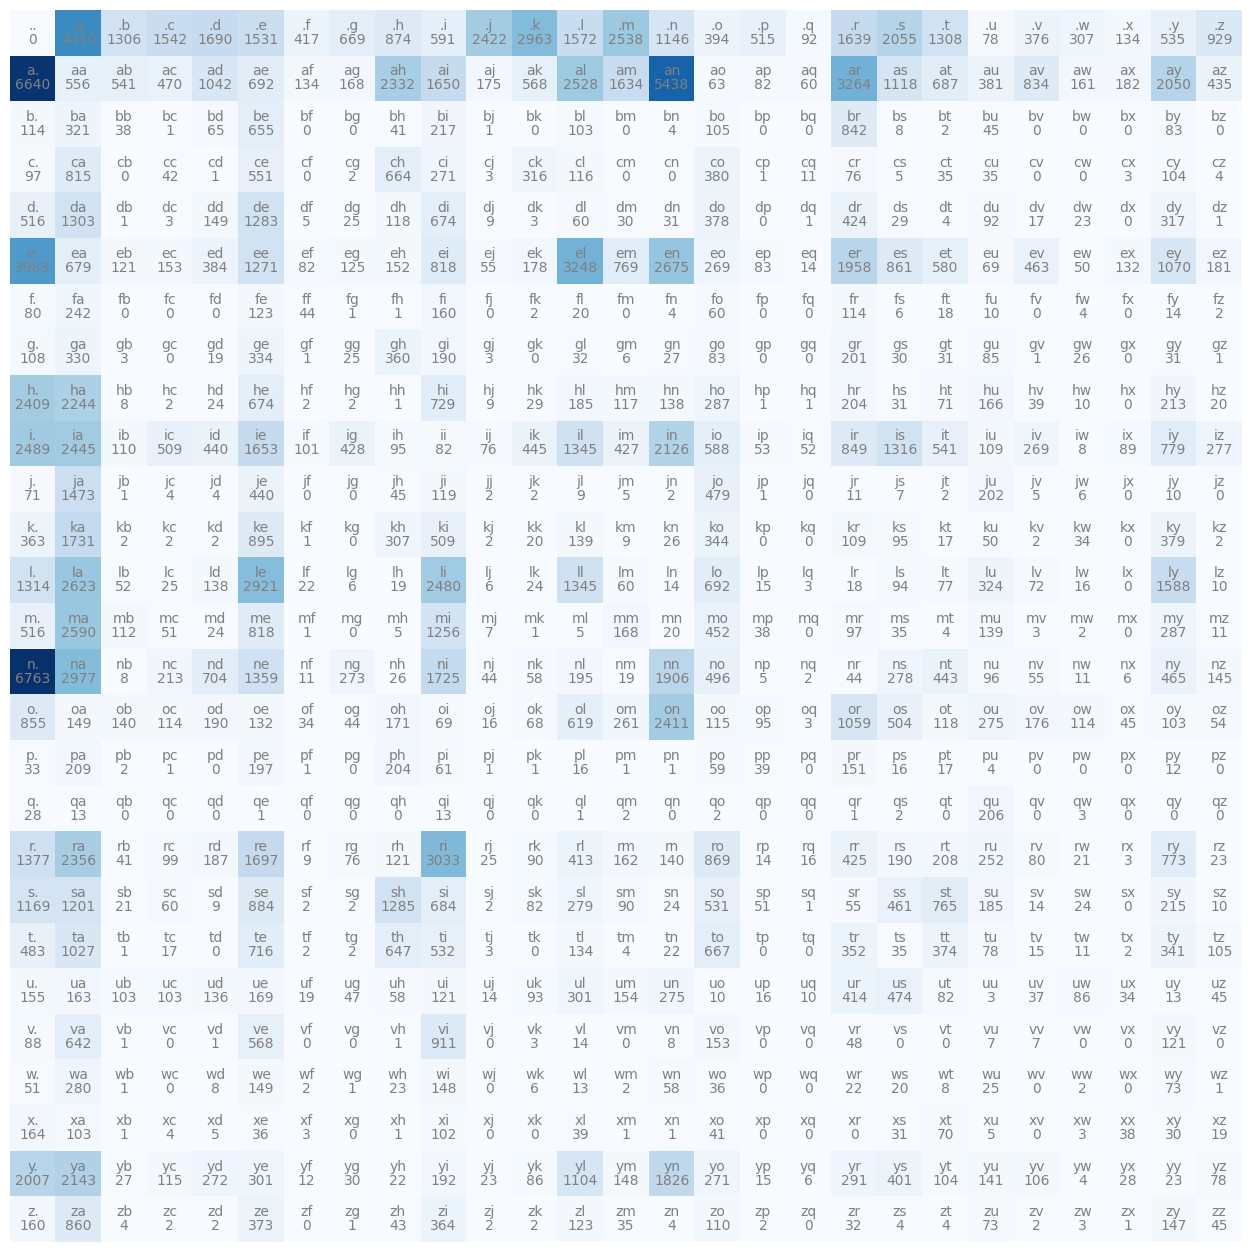

In [76]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [111]:
# first row are the number of times, a word starts with letter 'g' <.>a
# to display the first row
N[0,:]    # same as N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [112]:
N[0:].shape

torch.Size([27, 27])

In [113]:
# determine probabilities
p = N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [114]:
# normalize
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [82]:
# sum of the row is 1
p.sum()

tensor(1.)

In [115]:
# sample from this distriuution. use torch
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
#p = p / p.sum()

In [116]:
p

tensor([0.7081, 0.3542, 0.1054])

In [119]:
# probability distribution
# tensor[0] probability is 60%, 1 - 30% and 2 - 10%
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [120]:
# https://pytorch.org/docs/stable/generated/torch.multinomial.html
torch.multinomial(p, num_samples=20, replacement=True, generator = g)

tensor([0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [124]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [129]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item() # sample of 1
itos[ix]

'j'

In [110]:
itos

In [149]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item() # sample of 1
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:    # end token
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [150]:
p.shape

torch.Size([27])

In [ ]:
# untrained

In [151]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        p = torch.ones(27) / 27.0
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item() # sample of 1
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:    # end token
            break
    print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.
ndxjxfpvslqtikyzsaloevgvvnundewkfmbjzqegruxiteaxchwtmurzsodridcdznojvaliypvrghvxtezrwguciqqvywhqelv.
viosvhibdhnceukgmtmwboscnbzoiwupnwnpipixtewbgsgyewfdacbfcxrvjypkmsbranmjrdsydotafvkdkbdepihzpwzsqdab.
vfuolwbasrtugttbiqbujfdtskceqjtcdlcndfujqllsppgkltalmlokdmsl.
fddmxjv.
mfsgxmw.
vdihkvngtojvrdsyqivcob.
uziengogtjvnvqgfjtkqufrxfjlwglykiiluohgnoiuwzylq.
fsgircvmhtipagkxwvjypnsriadmfujnlkcicvatjvryzeljxkbrlrjsp.


In [152]:
P = N.float()
#P = P / P.sum()
P.sum()

tensor(228146.)

In [154]:
P.shape

torch.Size([27, 27])

In [156]:
P.sum(1, keepdim = True).shape

torch.Size([27, 1])

In [157]:
# P is 27x27
# P.sum(1, keepdin = True) is 27x1 array

P = N.float()
P = P / P.sum(1, keepdim=True)         # SUM the row

In [160]:
P[0].sum()

tensor(1.)

In [161]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item() # sample of 1
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:    # end token
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
